In [1]:
%reset -f
import sys
sys.path.append("/home/jose/Documents/Maestria/Codigo/otilib/build/")
import pyoti.sparse as oti
import Malla
import Ens_K as ens
import Solucion as sol
import numpy as np
import pylab

### Solucion mediante Forma matricial de Duals
Se usa librería complex o OTIs

In [28]:
def dir_ima (mat, iD, eD, ima, h): #Asigna direccion imaginaria a la variable iD del elemento eD en la matriz mat
    if ima == "duals_complex" or ima == "complex":
        m = mat.astype("complex")  
        m[eD,iD] = m[eD,iD] + h*1j 
    elif ima == "duals_oti":
        m = mat + 0*oti.e(1)
        m[eD,iD] = m[eD,iD] + oti.e(1)
    else:
        print ("numero imaginario no valido")
    return(m)

In [29]:
def calc(ima, h, K_tgv, f): #Soluciona FEM desplazamiento y la derivada mediante numeros imaginarios
    if ima == "duals_complex":
        ur, ueph = sol.MDuals_complex(K_tgv,f) #Solucion con Duals matricial y libreria estandar complejos
        uep = ueph/h    
    elif ima == "duals_oti":
        ur, uep = sol.MDuals_oti(K_tgv,f)   #Solucion con Duals matricial y libreria otilib
    elif ima == "complex":
        ur, uih = sol.complex(K_tgv,f)
        uep = uih/h
    else:
        print ("numero imaginario no valido") 
    return(ur, uep)

In [30]:
def main(ima, h):
    nodos, eles, mat, Cond_front = Malla.lect2D("cercha2D")
    dof = 2 #grados de libertad (2 para cercha 2D)
    iD = 0 #Variable para derivar desplazamiento (u): 0 para A (seccion transversal) // 1 para E (Modulo elast.)
    eD = 2 #Elemento al que se le quiere derivar iD (inicia en 0)
    m = dir_ima(mat, iD, eD, ima, h)
    K = ens.K(dof, eles, nodos, m)       #Forma matriz K
    K_tgv,f = sol.cf(K, Cond_front, dof) #Aplica Condiciones de frontera metodo TGV
    ur, uep = calc(ima, h, K_tgv, f) #solucion u_real, u_imag
    return(ur, uep)

In [61]:
def plot(ur_exacto, uep_exacto, ima, comp):
#def plot(ur_exacto, ima, comp):
    nevals =10
    e = np.zeros([nevals,2])
    h = np.zeros(nevals)
    for i in range(nevals):
        h[i] = 10**(-i)
        ur, uep = main(ima, h[i])
        e[i,0] = abs(ur_exacto - ur[comp])/abs(ur_exacto)
        e[i,1] = abs(uep_exacto - uep[comp])/abs(uep_exacto)
    pylab.plot(h, e[:,0], '.-', label = 'Solucion MEF')
    pylab.plot(h, e[:,1], '--' , label='Derivada')
    pylab.legend(loc='upper right')
    pylab.xscale('log')
    #pylab.yscale('log')
    pylab.xlabel('h')
    pylab.ylabel('Error relativo') 
    return 

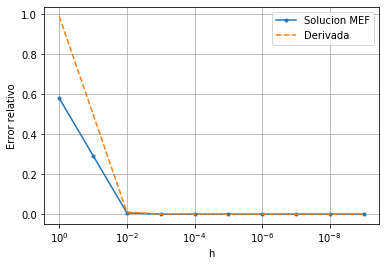

In [62]:
ima = "complex" #numeros imaginarios y librerias empleadas "complex", "duals_comp" o "duals_oti"
ur, uep = main("duals_oti", 1)
comp = 3 #componente del sistema a la que se va a graficar la funcion
ur_exacto = ur[comp]
uep_exacto = uep[comp]
#ur_exacto = -6.898e-7
plot(ur_exacto, uep_exacto, ima, comp)
#plot(ur_exacto, ima, comp)

#ima = "duals_complex"
#plot(ur_exacto, ima, comp)

#ima = "duals_oti"
#plot(ur_exacto, ima, comp)

pylab.gca().invert_xaxis()
pylab.grid()
pylab.savefig("solu.pdf")
pylab.show()